# Histogram
 Histograms are a great way to visualize the distributions of a single variable and it is one of the must for initial exploratory analysis with fewer variables. Histograms are available in the matplotlib library. The hist() function is used to draw a histogram. It comes with several options to customize the histogram.

 - What bins means
 - Why size is important when creating histograms
 - Several rules for determining the number of bins to use for a histogram

 How many bins? (ceiling function)

$$ k = \lceil \frac{max(x) - min(x)}{h} \rceil$$

where $h$ is the bin width.

 - Sturges' rule: $k = \lceil log_2(n) + 1 \rceil$
 - Rice rule: $k = \lceil 2n^{1/3} \rceil$
 - Doane's formula: $k = \lceil 1 + log_2(n) + log_2(1 + \frac{|g_1|}{\sigma_{g_1}}) \rceil$
 - Scott's normal reference rule: $k = \lceil \frac{max(x) - min(x)}{3.5 \sigma} \rceil$
 - Freedman–Diaconis' choice: $k = \lceil \frac{max(x) - min(x)}{2 IQR} \rceil$

where $g_1$ is the sample skewness, $\sigma_{g_1}$ is the standard error of the skewness, and $IQR$ is the interquartile range.

 - https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width
 - https://en.wikipedia.org/wiki/Histogram#Mathematical_definition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


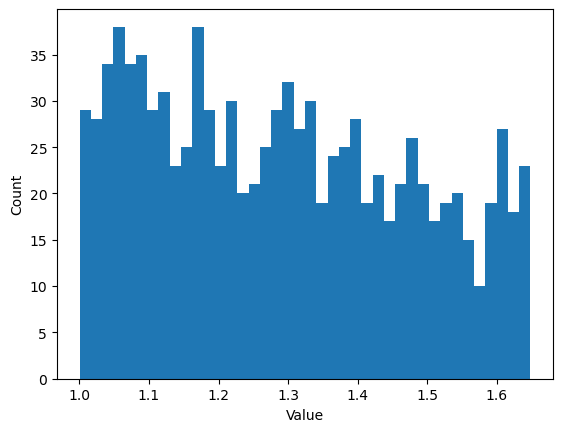

In [11]:
# Create some data

# Generate 1000 random numbers
n = 1000

# number of histogram bins
k = 40

# generate lognormal distribution
#data = np.random.lognormal(size=n)
data = np.exp(np.random.rand(n)/2)

plt.hist(data,k)
#plt.hist(data, bins=k, normed=True, histtype='stepfilled', alpha=0.2)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()



Freedman-Diaconis rule: 11 bins


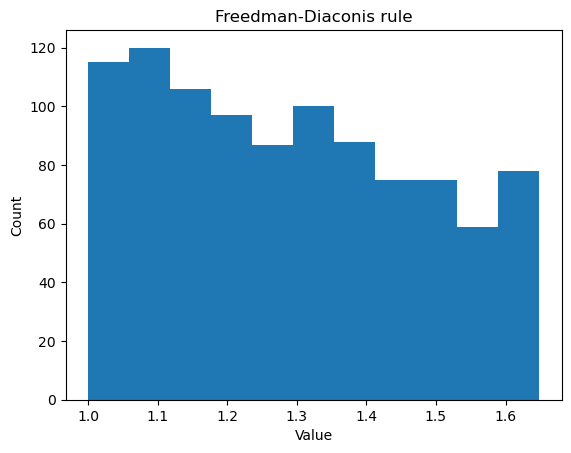

In [13]:
# try Freedman-Diaconis rule

r = 2*stats.iqr(data)*n**(-1/3)
b = np.ceil((max(data)-min(data))/r)
print('Freedman-Diaconis rule: %d bins' % b)

plt.hist(data, bins=int(b))
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Freedman-Diaconis rule')
plt.show()


/var/folders/v0/gk1p00xd7sx91qnxby0v4_0m0000gn/T/ipykernel_47277/3272056805.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, bins=int(b))


<Axes: ylabel='Density'>

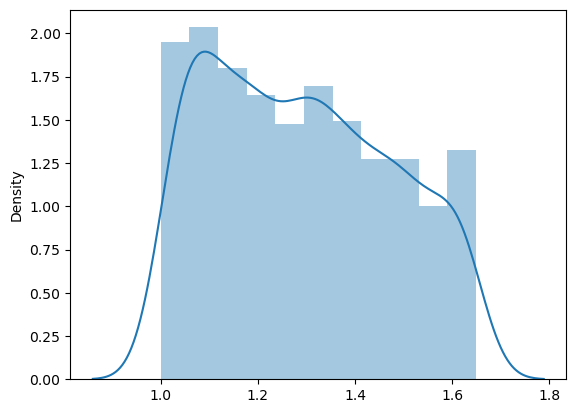

In [15]:
import seaborn as sns

sns.distplot(data, bins=int(b))